<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 1. Import python package

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Load files

In [2]:
# Visual Python: Data Analysis > File
df_iris = pd.read_csv('data/iris.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# 3. Data Info

## 3.1 General

### 3.1.1 Info

In [3]:
# Visual Python: Data Analysis > Data Info
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 3.1.2 Describe

In [4]:
# Visual Python: Data Analysis > Data Info
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3.1.3 Head

In [5]:
# Visual Python: Data Analysis > Data Info
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 3.1.4 Tail

In [6]:
# Visual Python: Data Analysis > Data Info
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## 3.2 Status

### 3.2.1 Null count

In [7]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df_iris.isnull().sum(), 'Non-Null Count': df_iris.notnull().sum()})

,Null Count,Non-Null Count
sepal_length,0,150
sepal_width,0,150
petal_length,0,150
petal_width,0,150
variety,0,150


### 3.2.2 Duplicated

In [8]:
# Visual Python: Data Analysis > Data Info
_duplicated = ([df_iris.duplicated().sum()] + [df_iris[col].duplicated().sum() for col in df_iris.columns])
_duplicated_df = pd.DataFrame({
    'Rows':[len(df_iris)]*len(_duplicated),
    'Unique':[len(df_iris) - dups for dups in _duplicated],
    'Duplicated': _duplicated,
    'Duplicated by': ['All columns'] + df_iris.columns.to_list()
}, index=['Combination']+df_iris.columns.to_list())
_duplicated_df

,Rows,Unique,Duplicated,Duplicated by
Combination,150,149,1,All columns
sepal_length,150,35,115,sepal_length
sepal_width,150,23,127,sepal_width
petal_length,150,43,107,petal_length
petal_width,150,22,128,petal_width
variety,150,3,147,variety


### 3.2.3 Unique

In [9]:
# Visual Python: Data Analysis > Data Info
df_iris['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### 3.2.4 Value counts

In [10]:
# Visual Python: Data Analysis > Data Info
_dfr = pd.DataFrame()
for col in df_iris.columns:
    if pd.api.types.is_numeric_dtype(df_iris[col]) and  df_iris[col].value_counts().size > 10:
        _value_counts = df_iris[col].value_counts(bins=10, sort=False)
        _dfr = pd.concat([_dfr, pd.DataFrame({(col,'bins'): _value_counts.index})], axis=1)
    else:
        _value_counts = df_iris[col].value_counts()
        _dfr = pd.concat([_dfr, pd.DataFrame({(col,'category'): _value_counts.index})], axis=1)
    _dfr = pd.concat([_dfr, pd.DataFrame({(col,'count'): _value_counts.values})], axis=1)
_dfr.replace(np.nan,'')

sepal_length          sepal_width         petal_length        \
            bins count           bins count           bins count   
0  (4.295, 4.66]     9  (1.997, 2.24]     4  (0.993, 1.59]    37   
1   (4.66, 5.02]    23   (2.24, 2.48]     7   (1.59, 2.18]    13   
2   (5.02, 5.38]    14   (2.48, 2.72]    22   (2.18, 2.77]     0   
3   (5.38, 5.74]    27   (2.72, 2.96]    24   (2.77, 3.36]     3   
4    (5.74, 6.1]    22    (2.96, 3.2]    50   (3.36, 3.95]     8   
5    (6.1, 6.46]    20    (3.2, 3.44]    18   (3.95, 4.54]    26   
6   (6.46, 6.82]    18   (3.44, 3.68]    10   (4.54, 5.13]    29   
7   (6.82, 7.18]     6   (3.68, 3.92]    11   (5.13, 5.72]    18   
8   (7.18, 7.54]     5   (3.92, 4.16]     2   (5.72, 6.31]    11   
9    (7.54, 7.9]     6    (4.16, 4.4]     2    (6.31, 6.9]     5   

      petal_width           variety        
             bins count    category count  
0  (0.0966, 0.34]    41      Setosa  50.0  
1    (0.34, 0.58]     8  Versicolor  50.0  
2    (0.58, 0.82]     1   Virginica  50.0  
3    (0.82, 1.06]     7                    
4     (1.06, 1.3]    21                    
5     (1.3, 1.54]    20                    
6    (1.54, 1.78]     6                    
7    (1.78, 2.02]    23                    
8    (2.02, 2.26]     9                    
9     (2.26, 2.5]    14

## 3.3 Statistics

### 3.3.1 count, min, max, quantile, sum, mean, median, var, std, skew, kurtosis

In [11]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'count': df_iris.count(),'min': df_iris.min(numeric_only=True),'max': df_iris.max(numeric_only=True),'quantile': df_iris.quantile(numeric_only=True),'sum': df_iris.sum(numeric_only=True),'mean': df_iris.mean(numeric_only=True),'median': df_iris.median(numeric_only=True),'var': df_iris.var(numeric_only=True),'std': df_iris.std(numeric_only=True),'skew': df_iris.skew(numeric_only=True),'kurtosis': df_iris.kurtosis(numeric_only=True)})

,count,min,max,quantile,sum,mean,median,var,std,skew,kurtosis
petal_length,150,1.0,6.9,4.35,563.7,3.758000,4.35,3.116278,1.765298,-0.274884,-1.402103
petal_width,150,0.1,2.5,1.30,179.9,1.199333,1.30,0.581006,0.762238,-0.102967,-1.340604
sepal_length,150,4.3,7.9,5.80,876.5,5.843333,5.80,0.685694,0.828066,0.314911,-0.552064
sepal_width,150,2.0,4.4,3.00,458.6,3.057333,3.00,0.189979,0.435866,0.318966,0.228249
variety,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3.2 cumsum

In [12]:
# Visual Python: Data Analysis > Data Info
df_iris[['sepal_length','sepal_width','petal_length','petal_width']].cumsum()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,10.0,6.5,2.8,0.4
2,14.7,9.7,4.1,0.6
3,19.3,12.8,5.6,0.8
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,851.6,446.7,543.0,171.9
146,857.9,449.2,548.0,173.8
147,864.4,452.2,553.2,175.8
148,870.6,455.6,558.6,178.1


## 3.4 Correlation

### 3.4.1 Correlation table

In [13]:
# Visual Python: Data Analysis > Data Info
df_iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 3.4.1 Correlation matrix

In [14]:
# Visual Python: Data Analysis > Data Info
_corr = df_iris.corr(numeric_only=True)
_corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## 3.5 Distribution

### 3.5.1 Histogram

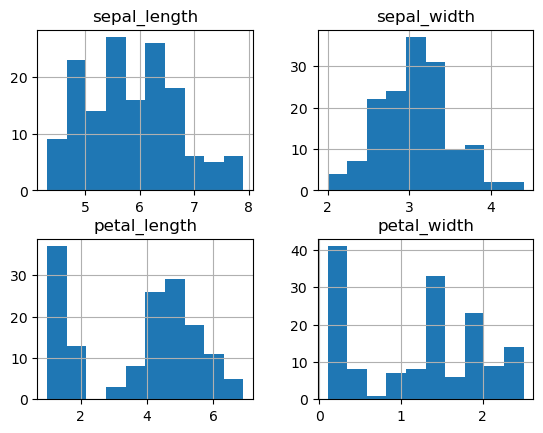

In [15]:
# Visual Python: Data Analysis > Data Info
df_iris.hist()
plt.show()

### 3.5.2 Sctter matrix

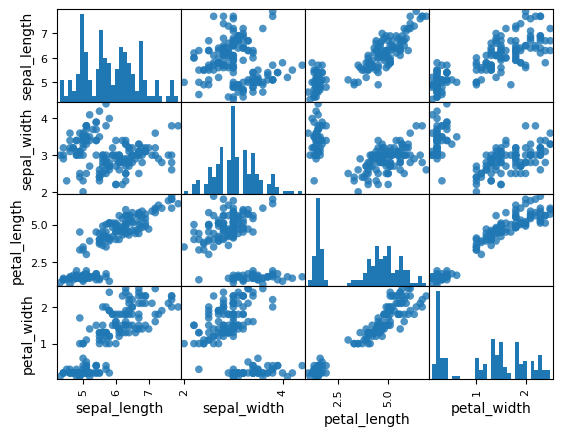

In [16]:
# Visual Python: Data Analysis > Data Info
pd.plotting.scatter_matrix(df_iris, marker='o', hist_kwds={'bins': 30}, s=30, alpha=.8)
plt.show()

### 3.5.3 Box plot

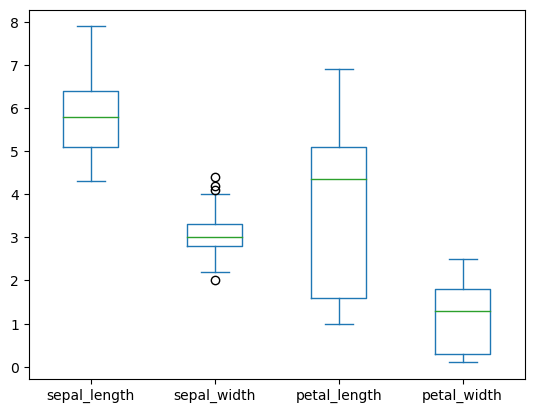

In [17]:
# Visual Python: Data Analysis > Data Info
df_iris.plot(kind='box')
plt.show()

### 3.5.4 Count plot

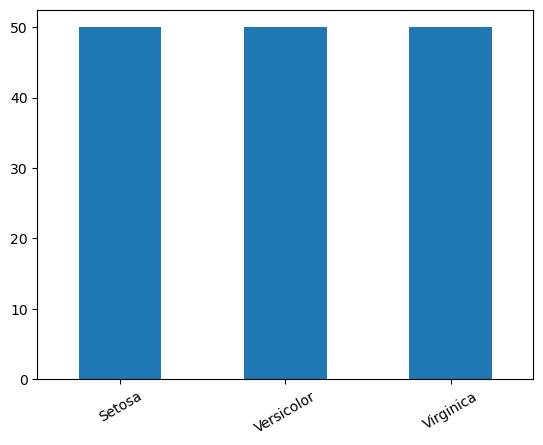

In [18]:
# Visual Python: Data Analysis > Data Info
df_iris['variety'].value_counts().plot(kind='bar', rot=30)
plt.show()

# 4. Snippets

In [19]:
# Visual Python: Data Analysis > Snippets
def as_int(x):
    """
    usage: df['col'] = df['col'].apply(as_int)
    """
    if not isinstance(x, str):
        return 0
    else:
        try:
            result = int(x)
            return result
        except ValueError:
            return 0.0

In [20]:
# Visual Python: Data Analysis > Snippets
def as_int(x):
    """
    usage: df['col'] = df['col'].apply(as_int)
    """
    if not isinstance(x, str):
        return 0
    else:
        try:
            result = int(x)
            return result
        except ValueError:
            return 0.0

---

In [21]:
# End of file